# UNHCR Data

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from IPython.display import display 

from dateutil import parser
plt.style.use('ggplot')

%matplotlib inline

# Load Data and Clean

In [8]:
%%time


seekers = pd.read_csv('asylum_seekers_monthly.csv')

# Fill missing values with consistent value
seekers = seekers.fillna(value = "")
# Replace all '*' with ''
seekers = seekers.replace(['*'], ['']) 

# Convert 'Year and Value' to numeric 
seekers['Year'] = pd.to_numeric(seekers['Year'], errors='coerce')
seekers['Value'] = pd.to_numeric(seekers['Value'], errors='coerce')

seekers.head()
# seekers.Origin.unique()

def parse_date(row):
    yyyymm = ('%s %s 01' % (row['Year'], row['Month']))
    return parser.parse(yyyymm)
   
seekers['YYYYMM'] = seekers.apply(parse_date, axis=1)

seekers.to_csv('asylum_seekers_monthly.csv')


CPU times: user 37.5 s, sys: 604 ms, total: 38.1 s
Wall time: 38.1 s


In [9]:
seekers = pd.read_csv('asylum_seekers_monthly.csv')
seekers.head()

,Unnamed: 0,Country / territory of asylum/residence,Origin,Year,Month,Value,YYYYMM
0,0,Australia,Afghanistan,1999,January,8.0,1999-01-01
1,1,Australia,Afghanistan,1999,February,10.0,1999-02-01
2,2,Australia,Afghanistan,1999,March,25.0,1999-03-01
3,3,Australia,Afghanistan,1999,April,25.0,1999-04-01
4,4,Australia,Afghanistan,1999,May,7.0,1999-05-01


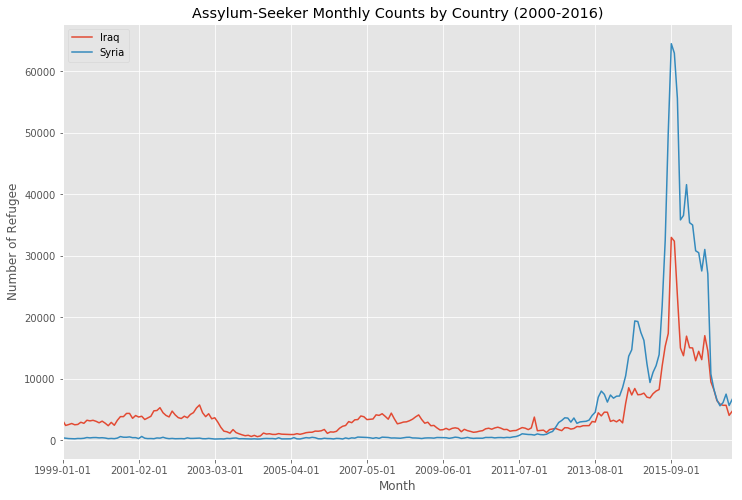

In [10]:
seekers.head()

# seekers['YYYYMM'] 

monthly = seekers[seekers['Origin'].isin(['Syrian Arab Rep.', 'Iraq'])]
monthly.set_index('YYYYMM', inplace=True)
group = monthly.groupby(['Origin', 'YYYYMM'], as_index=False)

total = monthly.groupby(['Origin', 'YYYYMM'])[['Value']].aggregate('sum')

data = {'Iraq' :[], 
        'Syrian Arab Rep.' :[]}

for index, row in total.iterrows():
    data[index[0]].append([row[0], index[1]])

# print(data['Iraq'])

df_iraq = pd.DataFrame(data['Iraq'])
df_iraq.set_index(1, inplace=True)
df_syria = pd.DataFrame(data['Syrian Arab Rep.'])
df_syria.set_index(1, inplace=True)

# df_iraq

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

df_iraq.plot(ax=ax, label='Iraq')
df_syria.plot(ax=ax, label='Syria')

plt.title("Assylum-Seeker Monthly Counts by Country (2000-2016)")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Refugee')
ax.legend(['Iraq', 'Syria'])


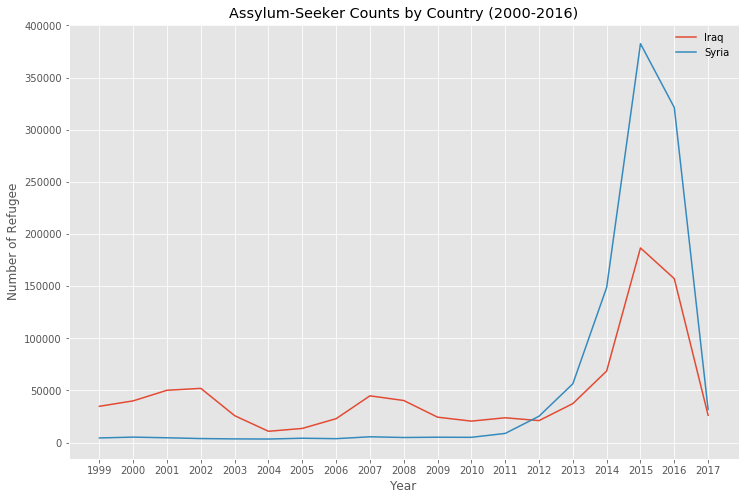

In [11]:

filter_df = seekers[seekers['Origin'].isin(['Iraq','Syrian Arab Rep.'])]
filter_df = seekers.groupby(['Origin', 'Year'])[['Value']].aggregate('sum')

iraq = filter_df.query("Origin == 'Iraq'")
syria = filter_df.query("Origin == 'Syrian Arab Rep.'")

# iraq['Year']
filter_df

fig = plt.figure(figsize=(12,8))
ax = plt.axes()

# filter_df.plot()
plt.plot(seekers.Year.unique(), iraq['Value'], label = 'Iraq')
plt.plot(seekers.Year.unique(), syria['Value'], label = 'Syria')

plt.title("Assylum-Seeker Counts by Country (2000-2016)")
ax.set_xlabel('Year')
ax.set_ylabel('Number of Refugee')
plt.xticks(seekers.Year.unique())
ax.legend(frameon=False)